In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
%matplotlib notebook
# matplotlib.rcParams['figure.figsize'] = (20, 20)

# Test code

In [28]:
df = pd.read_csv('s-output-400-800.csv')

df2 = df.copy()
df2.dropna(inplace=True, subset=['tabled_Pris eks omreg', 'tabled_Årsmodell'])

df3 = df2[df2['title'].str.lower().str.contains('toyota avensis')]

<IPython.core.display.Javascript object>


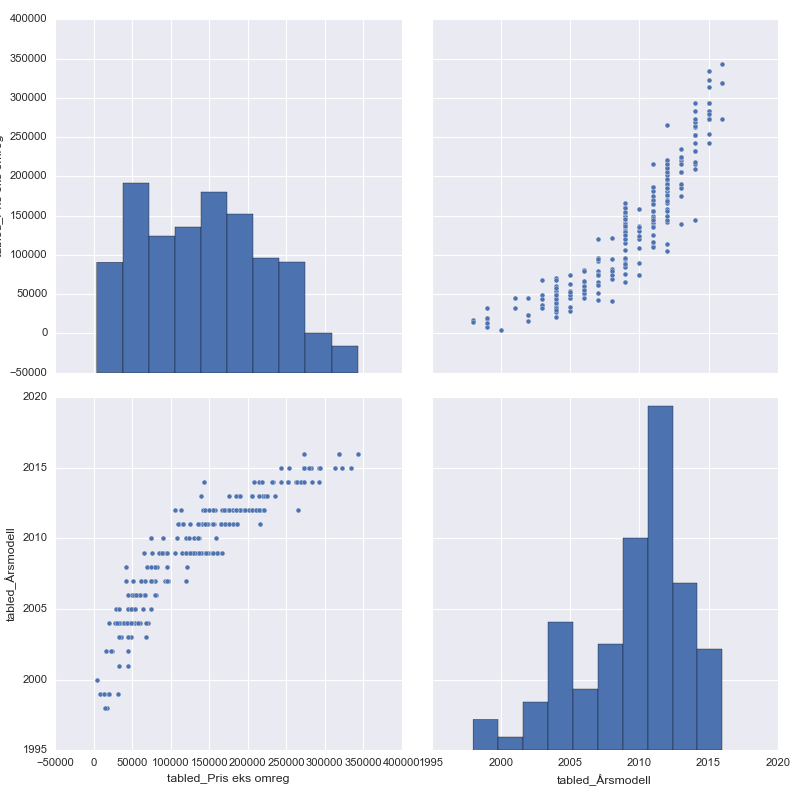

In [29]:
g = sns.pairplot(df3, vars=['tabled_Pris eks omreg', 'tabled_Årsmodell'], size=5)
sns.plt.show()

# Merge and analyze

In [21]:
files = [
    's-output-100.csv',
    's-output-100-200.csv',
    's-output-200-400.csv',
    's-output-400-800.csv',
]
frames = [pd.read_csv(fn, index_col='id') for fn in files]
merged_frames = pd.concat(frames)

In [23]:
avensis

(35914,)

<IPython.core.display.Javascript object>


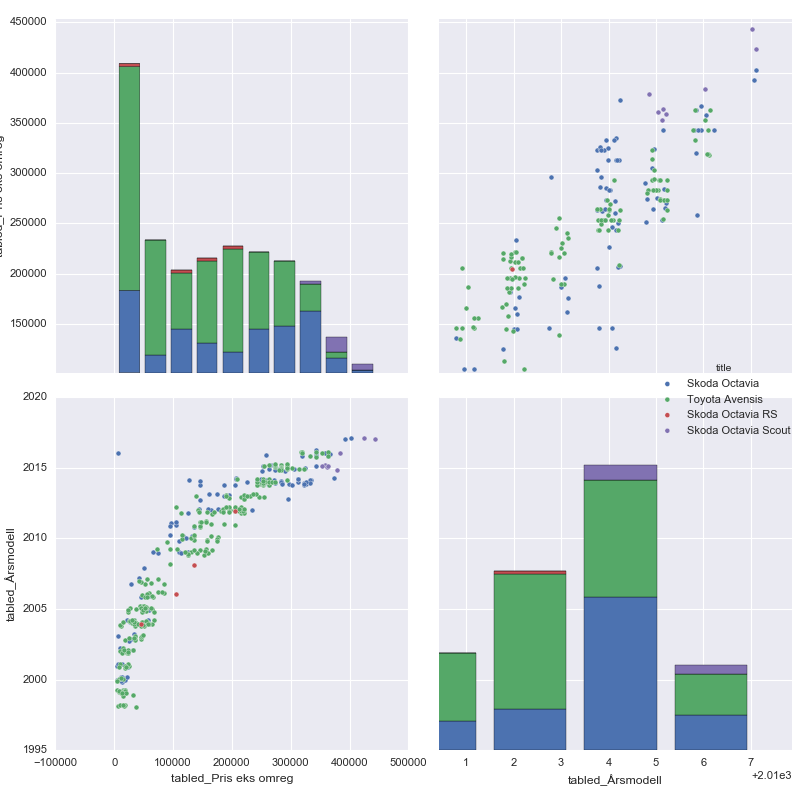

In [32]:
columns = ['tabled_Pris eks omreg', 'tabled_Årsmodell']

mf2 = merged_frames.copy()
mf2.dropna(inplace=True, subset=columns)

# Filter interesting subjects
octavia_bensin = np.logical_and(
    mf2['title'].str.lower().str.contains('skoda octavia'),
    mf2['tabled_Drivstoff'].str.lower().str.contains('bensin'),
)
avensis_bensin = np.logical_and(
    mf2['title'].str.lower().str.contains('toyota avensis'),
    mf2['tabled_Drivstoff'].str.lower().str.contains('bensin'),
)
keep = np.logical_or(
    octavia_bensin,
    avensis_bensin
)

# Add noise to Årsmodell for visual purposes
mf2['tabled_Årsmodell'] += np.random.uniform(size=mf2['tabled_Årsmodell'].shape)*0.5-0.25

g = sns.pairplot(mf2[keep], hue='title', vars=columns, size=5)
sns.plt.show()

<IPython.core.display.Javascript object>


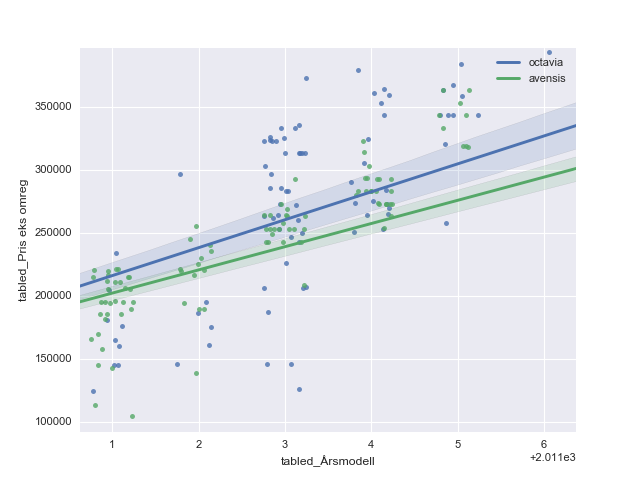

In [38]:
sns.plt.figure()
sns.regplot('tabled_Årsmodell', 'tabled_Pris eks omreg', data=mf2[octavia_bensin])
sns.regplot('tabled_Årsmodell', 'tabled_Pris eks omreg', data=mf2[avensis_bensin])
sns.plt.legend(['octavia', 'avensis'])
sns.plt.show()

In [31]:
mf2[octavia_bensin]

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


ValueError: cannot reindex from a duplicate axis

In [14]:
mf2.columns

Index(['place', 'price', 'tabled_1. gang registrert', 'tabled_Antall dører',
       'tabled_Antall eiere', 'tabled_Antall seter', 'tabled_Avgiftsklasse',
       'tabled_Bilen står i', 'tabled_CO2 utslipp', 'tabled_Drivstoff',
       'tabled_Effekt', 'tabled_Farge', 'tabled_Fargebeskrivelse',
       'tabled_Forrige pris', 'tabled_Girkasse', 'tabled_Hjuldrift',
       'tabled_Hjuldriftnavn', 'tabled_Innskudd', 'tabled_Interiørfarge',
       'tabled_Karosseri', 'tabled_Km.stand', 'tabled_Omregistrering',
       'tabled_Pris eks omreg', 'tabled_Reg.nr.', 'tabled_Salgsform',
       'tabled_Str. lasterom', 'tabled_Sylindervolum', 'tabled_Vekt',
       'tabled_Årsavgift', 'tabled_Årsmodell', 'title'],
      dtype='object')

In [14]:
mf2['tabled_1. gang registrert']

id
98531167    30.01.2017
79033773    25.10.2001
98675351    29.08.2003
98676160    14.07.1999
92820962    06.02.2014
98667627    04.08.1999
98661074    13.12.1999
98661096    15.08.2007
93884509    18.03.2013
96421036    30.05.2013
98648551    06.03.2007
98598156           NaN
98642428    29.05.2001
98323381    29.10.2003
98619135           NaN
98632980    05.08.2010
98613231    03.12.2003
98613231    03.12.2003
88836616    30.12.2010
97595499           NaN
96277251           NaN
98626754           NaN
98626016    19.03.2007
98624573    29.12.2008
98624280    06.01.2010
98623493    23.01.1998
98622264    08.03.2001
98613263           NaN
98609333    18.10.2013
98608376    01.07.2004
               ...    
96687568    12.02.2015
81239658    23.09.2008
95655759    04.10.2006
96661670    27.03.2014
96641538    01.07.2015
96644403    05.03.2010
96643908    20.01.2012
96643234           NaN
96642528    11.08.2015
96642112    30.08.2013
96640231    16.11.2015
96639576    15.04.2014
96637956

In [17]:
mf2['tabled_Km.stand']

id
79033773    182 650 km
98652294     76 900 km
98661074    189 550 km
93884509    107 000 km
98659260    147 900 km
98643356     41 300 km
98644035    259 000 km
98619135    123 000 km
98574934    101 000 km
88836616    138 000 km
98599224    164 000 km
98626016    251 112 km
95633263     52 000 km
98534380    269 499 km
98611689    284 250 km
98609333     61 614 km
98608747     65 310 km
89711523     99 238 km
98603313     68 000 km
96189356    106 000 km
98597223     98 000 km
98597141     91 183 km
97589439    164 500 km
95281582     42 000 km
92751517    140 000 km
98592313    163 000 km
98589596    210 000 km
98586120    101 542 km
97315260    125 000 km
98587737     93 500 km
               ...    
96647524    113 000 km
96645680     72 500 km
96644403     90 000 km
96645377     24 900 km
96642722     96 000 km
96642112     82 634 km
96638801     64 600 km
96633089    102 000 km
96051614    116 000 km
96614113    147 700 km
96582764    146 000 km
96582362     45 791 km
96581993